<a href="https://colab.research.google.com/github/Rabittitan/MC-Team7/blob/main/BTL_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Khai Báo Thư Viện


In [215]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import math
import plotly.express as px
import plotly.graph_objects as go
from sklearn.utils import shuffle
from plotly.subplots import make_subplots
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Xử Lý Dữ Liệu

Khai Báo Dữ liệu


In [216]:
df = pd.read_csv("/content/data_song.csv")
df.head()


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,5yY9lUy8nbvjM1Uyo1Uqoc,Life Is Good (feat. Drake),Future,93,5uCEoLCj3ZZZ1EtzQdQWVl,Life Is Good (feat. Drake),2020-01-10,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,2,-5.831,0,0.4810,0.0706,0.0000,0.1520,0.5080,142.037,237735
1,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,10,-6.687,0,0.0559,0.1040,0.0000,0.7900,0.6420,116.971,196653
2,3R8CyhJfVjvgIROd5RSGhQ,I Can See,Mac Miller,73,5sY6UIQ32GqwMLAfSNEaXb,Circles,2020-01-17,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,5,-9.922,0,0.0882,0.3910,0.0126,0.0996,0.0546,114.860,220853
3,2Ec33AVlkTTq8BHFgBTdQs,Futsal Shuffle 2020,Lil Uzi Vert,91,4uTOUYhLrGRKkfxfPKTkuy,Futsal Shuffle 2020,2019-12-12,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,7,-8.191,0,0.1560,0.0327,0.0000,0.2310,0.2960,136.970,198913
4,7FIWs0pqAYbP91WWM0vlTQ,Godzilla (feat. Juice WRLD),Eminem,79,4otkd9As6YaxxEkIjXPiZ6,Music To Be Murdered By,2020-01-17,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,10,-5.260,0,0.3420,0.1450,0.0000,0.2920,0.8290,165.995,210800


## Kiểm Tra Dữ Liệu và Làm Sạch

In [217]:
df.shape

(16740, 23)

In [218]:
pd.value_counts(df.dtypes)

object     10
float64     9
int64       4
dtype: int64

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16740 entries, 0 to 16739
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  16740 non-null  object 
 1   track_name                16737 non-null  object 
 2   track_artist              16737 non-null  object 
 3   track_popularity          16740 non-null  int64  
 4   track_album_id            16740 non-null  object 
 5   track_album_name          16737 non-null  object 
 6   track_album_release_date  16740 non-null  object 
 7   playlist_name             16740 non-null  object 
 8   playlist_id               16740 non-null  object 
 9   playlist_genre            16740 non-null  object 
 10  playlist_subgenre         16740 non-null  object 
 11  danceability              16740 non-null  float64
 12  energy                    16740 non-null  float64
 13  key                       16740 non-null  int64  
 14  loudne

In [220]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,16740.000000,16740.000000,16740.000000,16740.000000,16740.000000,16740.000000,16740.000000,16740.000000,16740.000000,16740.000000,16740.000000,16740.000000,16740.000000
mean,39.749821,0.636995,0.729778,5.350597,-6.621001,0.573835,0.116154,0.138431,0.123451,0.202344,0.476932,123.782482,227365.732796
std,24.002644,0.155196,0.179494,3.599418,3.076212,0.494533,0.109747,0.198359,0.266016,0.164115,0.234093,25.816267,66680.631045
min,0.000000,0.000000,0.016100,0.000000,-26.207000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,21.000000,0.534000,0.617000,2.000000,-8.125000,0.000000,0.042000,0.006840,0.000000,0.094200,0.291000,104.919250,184032.250000
50%,43.000000,0.646000,0.757500,6.000000,-5.992000,1.000000,0.066300,0.046150,0.000077,0.134000,0.471000,126.002000,215964.500000
75%,59.000000,0.753000,0.875000,8.000000,-4.472750,1.000000,0.151000,0.190000,0.029200,0.276000,0.658250,137.083250,258816.500000
max,99.000000,0.983000,0.999000,11.000000,1.275000,1.000000,0.877000,0.994000,0.987000,0.996000,0.991000,219.991000,517125.000000


In [221]:
# Check for null values for each attribute (column)
null_values_by_column = df.isnull().sum()

# Display the result
print("Null values by column:")
print(null_values_by_column)

Null values by column:
track_id                    0
track_name                  3
track_artist                3
track_popularity            0
track_album_id              0
track_album_name            3
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [222]:
#xu ly du lieu null
df_cleaned = df.dropna()
print("Null values by column:")
print(df_cleaned.isnull().sum())

Null values by column:
track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


Dưới đây là danh sách tất cả các đặc trưng khác nhau của âm nhạc:

---
track_id: ID duy nhất của bài hát

track_name: Tên bài hát

track_artist: Nghệ sĩ thực hiện bài hát

lyrics: Lời bài hát

track_popularity: Mức độ phổ biến của bài hát (0-100) nơi mức cao hơn là tốt hơn

track_album_id: ID duy nhất của album

track_album_name: Tên album của bài hát

track_album_release_date: Ngày phát hành album

playlist_name: Tên của danh sách phát

playlist_id: ID của danh sách phát

playlist_genre: Thể loại của danh sách phát

playlist_subgenre: Thể loại phụ của danh sách phát

danceability: Mức độ phù hợp để nhảy dựa trên sự kết hợp của các yếu tố âm nhạc bao gồm tempo, ổn định nhịp điệu, độ mạnh của nhịp đập và sự đều đặn tổng thể. Giá trị 0.0 là ít phù hợp nhất để nhảy và 1.0 là phù hợp nhất để nhảy.

energy: Một thước đo từ 0.0 đến 1.0 và đại diện cho một thước đo nhận thức về cường độ và hoạt động. Thông thường, các bản nhạc năng lượng cao cảm thấy nhanh, to và ồn ào. Ví dụ, death metal có năng lượng cao, trong khi một bản prelude của Bach có điểm thấp trên thang đo. Các đặc trưng nhận thức đóng góp vào thuộc tính này bao gồm phạm vi động, độ to perceived, màu sắc, tỷ lệ bắt đầu và entropy tổng thể.

key: Tổng số khóa được ước lượng của bài hát. Số nguyên ánh xạ đến các nốt nhạc bằng cách sử dụng ký hiệu Pitch Class chuẩn. Ví dụ: 0 = C, 1 = C♯/D♭, 2 = D, v.v. Nếu không có khóa nào được phát hiện, giá trị là -1. loudness: Độ to của bài hát tổng thể tính bằng decibels (dB). Các giá trị độ to được lấy trung bình trên toàn bộ bài hát và hữu ích để so sánh độ to tương đối của các bài hát. Độ to là chất lượng của âm thanh là yếu tố tâm lý chính của sức mạnh vật lý (biên độ). Các giá trị thường nằm trong khoảng từ -60 đến 0 db.

mode: Chế độ chỉ ra tính chất (major hoặc minor) của một bài hát, loại thang mà nội dung giai điệu của nó được tạo ra. Major được biểu diễn bằng 1 và minor là 0.

speechiness: Speechiness phát hiện sự hiện diện của các từ nói trong một bài hát. Càng nhiều bản ghi giống như lời nói độc quyền (ví dụ: talk show, sách nói, thơ), giá trị thuộc tính càng gần 1.0. Các giá trị trên 0.66 mô tả các bài hát có thể hoàn toàn được tạo ra từ các từ nói. Các giá trị giữa 0.33 và 0.66 mô tả các bài hát có thể chứa cả âm nhạc và lời nói, hoặc trong các phần hoặc lớp, bao gồm các trường hợp như âm nhạc rap. Các giá trị dưới 0.33 rất có thể đại diện cho âm nhạc và các bài hát không giống lời nói khác.

acousticness: Một thước đo tự tin từ 0.0 đến 1.0 về việc bài hát có phải là acoustic hay không. 1.0 đại diện cho sự tự tin cao bài hát là acoustic.

instrumentalness: Dự đoán liệu một bài hát có chứa giọng hát hay không. “Ooh” và “aah” được coi là nhạc cụ trong ngữ cảnh này. Các bài hát rap hoặc lời nói rõ ràng là “vocal”. Giá trị instrumentalness càng gần 1.0, khả năng bài hát không chứa nội dung giọng hát càng lớn. Các giá trị trên 0.5 được dự định để đại diện cho các bài hát nhạc cụ, nhưng sự tự tin cao hơn khi giá trị tiếp cận 1.0. liveness: Phát hiện sự hiện diện của khán giả trong bản ghi. Các giá trị liveness cao hơn đại diện cho xác suất tăng bài hát được biểu diễn trực tiếp. Một giá trị trên 0.8 cung cấp khả năng mạnh mẽ rằng bài hát được biểu diễn trực tiếp.

valence: Một thước đo từ 0.0 đến 1.0 mô tả sự tích cực âm nhạc được truyền đạt bởi một bài hát. Các bài hát có valence cao nghe có vẻ tích cực hơn (ví dụ: vui vẻ, phấn khích, hạnh phúc), trong khi các bài hát có valence thấp nghe có vẻ tiêu cực hơn (ví dụ: buồn, trầm cảm, tức giận).

*tempo: *Tổng số tempo ước lượng của một bài hát tính bằng nhịp mỗi phút (BPM). Trong thuật ngữ âm nhạc, tempo là tốc độ hoặc nhịp độ của một tác phẩm nhất định và trực tiếp bắt nguồn từ thời gian trung bình của nhịp đập.

duration_ms: Thời lượng của bài hát tính bằng mili giây

language: Ngôn ngữ của lời bài hát


In [223]:
df.nunique()

track_id                    15343
track_name                  13438
track_artist                 6028
track_popularity              100
track_album_id              12491
track_album_name            11284
track_album_release_date     3357
playlist_name                 227
playlist_id                   237
playlist_genre                  3
playlist_subgenre              12
danceability                  800
energy                        881
key                            12
loudness                     7957
mode                            2
speechiness                  1246
acousticness                 3485
instrumentalness             3940
liveness                     1509
valence                      1274
tempo                       10678
duration_ms                 12111
dtype: int64

In [224]:
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Unique values per Categorical feature", "Unique values per Numerical feature"))


temp_data=df.select_dtypes(exclude="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='#016CC9')),
    row=1, col=1
)


temp_data=df.select_dtypes(include="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='#DEB078')),
    row=1, col=2
)

fig.show()

In [225]:
# Xóa các cột cụ không cần thiết cho mô hình đánh giá trực tiếp trên df
columns_to_drop = ['track_id','playlist_name','playlist_subgenre' ,'track_name', 'track_artist', 'track_popularity', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_id']

df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Kiểm tra lại dữ liệu sau khi xóa các cột
df.head()

,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,rap,0.676,0.609,2,-5.831,0,0.4810,0.0706,0.0000,0.1520,0.5080,142.037,237735
1,rap,0.896,0.586,10,-6.687,0,0.0559,0.1040,0.0000,0.7900,0.6420,116.971,196653
2,rap,0.699,0.503,5,-9.922,0,0.0882,0.3910,0.0126,0.0996,0.0546,114.860,220853
3,rap,0.881,0.457,7,-8.191,0,0.1560,0.0327,0.0000,0.2310,0.2960,136.970,198913
4,rap,0.808,0.745,10,-5.260,0,0.3420,0.1450,0.0000,0.2920,0.8290,165.995,210800


In [226]:
# Display unique values for each attribute (column)
unique_values_by_column = df.apply(lambda x: x.unique())

# Display the result
print("Unique values by column:")
print(unique_values_by_column)

Unique values by column:
playlist_genre                                       [rap, rock, edm]
danceability        [0.676, 0.896, 0.699, 0.881, 0.808, 0.823, 0.8...
energy              [0.609, 0.586, 0.503, 0.457, 0.745, 0.552, 0.6...
key                            [2, 10, 5, 7, 4, 11, 0, 9, 8, 1, 6, 3]
loudness            [-5.831, -6.687, -9.922, -8.191, -5.26, -7.57,...
mode                                                           [0, 1]
speechiness         [0.481, 0.0559, 0.0882, 0.156, 0.342, 0.324, 0...
acousticness        [0.0706, 0.104, 0.391, 0.0327, 0.145, 0.0174, ...
instrumentalness    [0.0, 0.0126, 0.00536, 5.84e-06, 0.000862, 0.0...
liveness            [0.152, 0.79, 0.0996, 0.231, 0.292, 0.122, 0.1...
valence             [0.508, 0.642, 0.0546, 0.296, 0.829, 0.418, 0....
tempo               [142.037, 116.971, 114.86, 136.97, 165.995, 12...
duration_ms         [237735, 196653, 220853, 198913, 210800, 20576...
dtype: object


In [227]:
# Remove rows with '?' values

df_cleaned = df[df != '?'].dropna()

# Display the cleaned DataFrame
print("DataFrame after removing rows with '?' values:")
print(df_cleaned)

DataFrame after removing rows with '?' values:
      playlist_genre  danceability  energy  key  loudness  mode  speechiness  \
0                rap         0.676   0.609    2    -5.831     0       0.4810   
1                rap         0.896   0.586   10    -6.687     0       0.0559   
2                rap         0.699   0.503    5    -9.922     0       0.0882   
3                rap         0.881   0.457    7    -8.191     0       0.1560   
4                rap         0.808   0.745   10    -5.260     0       0.3420   
...              ...           ...     ...  ...       ...   ...          ...   
16735            edm         0.428   0.922    2    -1.814     1       0.0936   
16736            edm         0.522   0.786    0    -4.462     1       0.0420   
16737            edm         0.529   0.821    6    -4.899     0       0.0481   
16738            edm         0.626   0.888    2    -3.361     1       0.1090   
16739            edm         0.603   0.884    5    -4.571     0       0.0

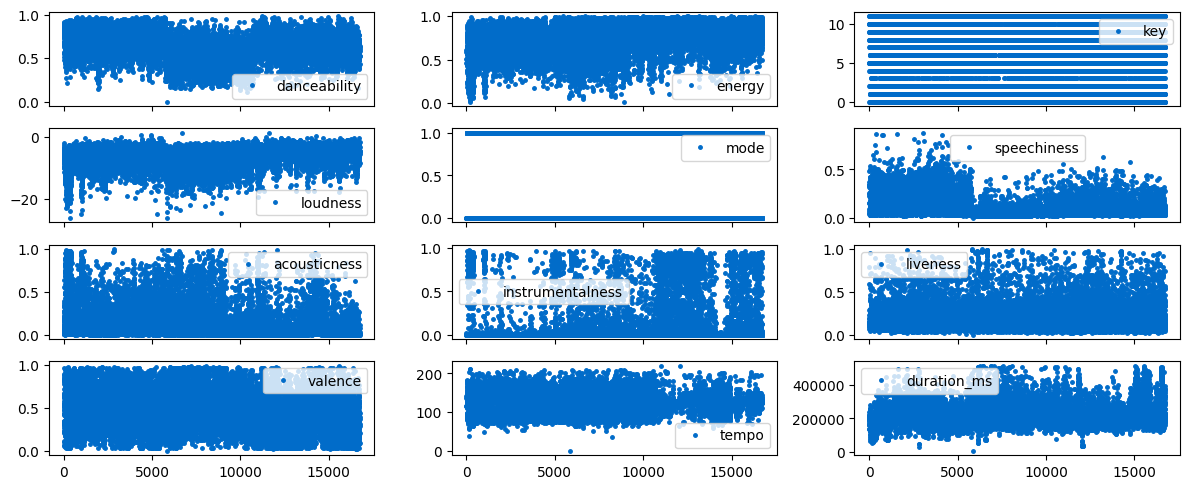

In [228]:
# For all Numerical columnn for all rows
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(12,5), markersize=5,color='#016CC9')
plt.tight_layout()

chọn playlist_genre là target vì vậy cần phải chuyển string sang int


---


thực hiện việc ánh xạ (mapping) giữa các giá trị chuỗi trong cột 'playlist_genre' của DataFrame (df) và các giá trị số tương ứng theo một bảng ánh xạ được định nghĩa trước đó

In [229]:
genre_mapping = {'rock': 0, 'rap': 1, 'edm': 2}
df['playlist_genre'] = df['playlist_genre'].map(genre_mapping)

# Kiểm tra lại kiểu dữ liệu
print(df['playlist_genre'].dtype)

int64


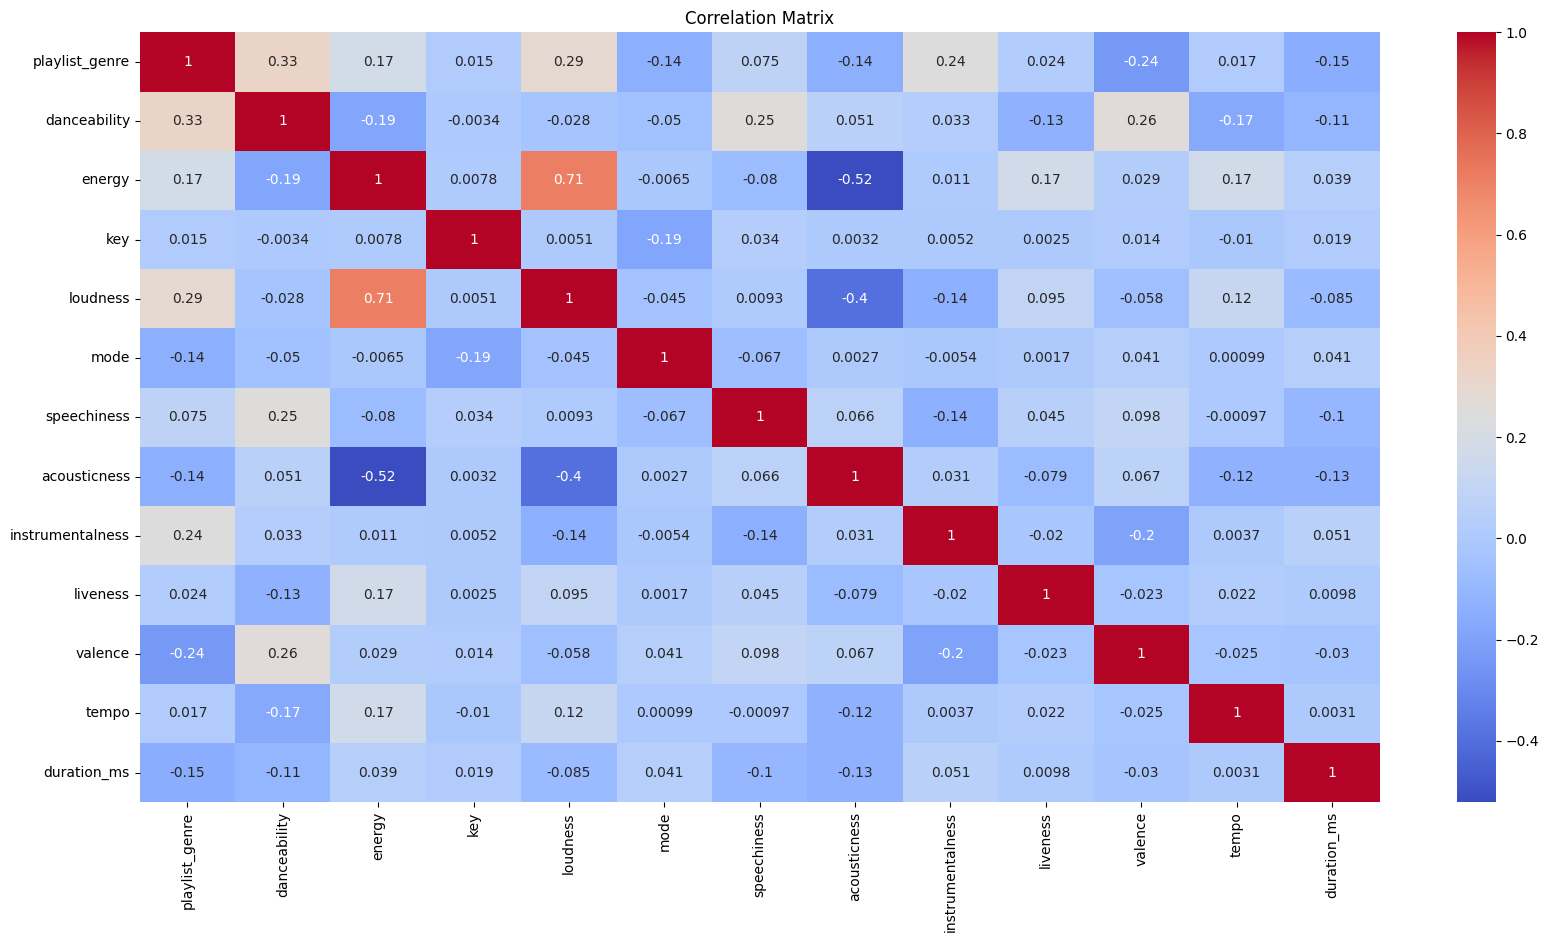

In [252]:
# # Calculate correlation matrix
# correlation_matrix = df.corr()

# # Display the correlation matrix
# print("Correlation Matrix:")
# print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [253]:
corr = df.corr()
corr["playlist_genre"].sort_values()

valence            -0.240126
duration_ms        -0.148809
mode               -0.142162
acousticness       -0.140734
key                 0.014591
tempo               0.017263
liveness            0.024145
speechiness         0.075075
energy              0.174814
instrumentalness    0.243824
loudness            0.288605
danceability        0.326697
playlist_genre      1.000000
Name: playlist_genre, dtype: float64

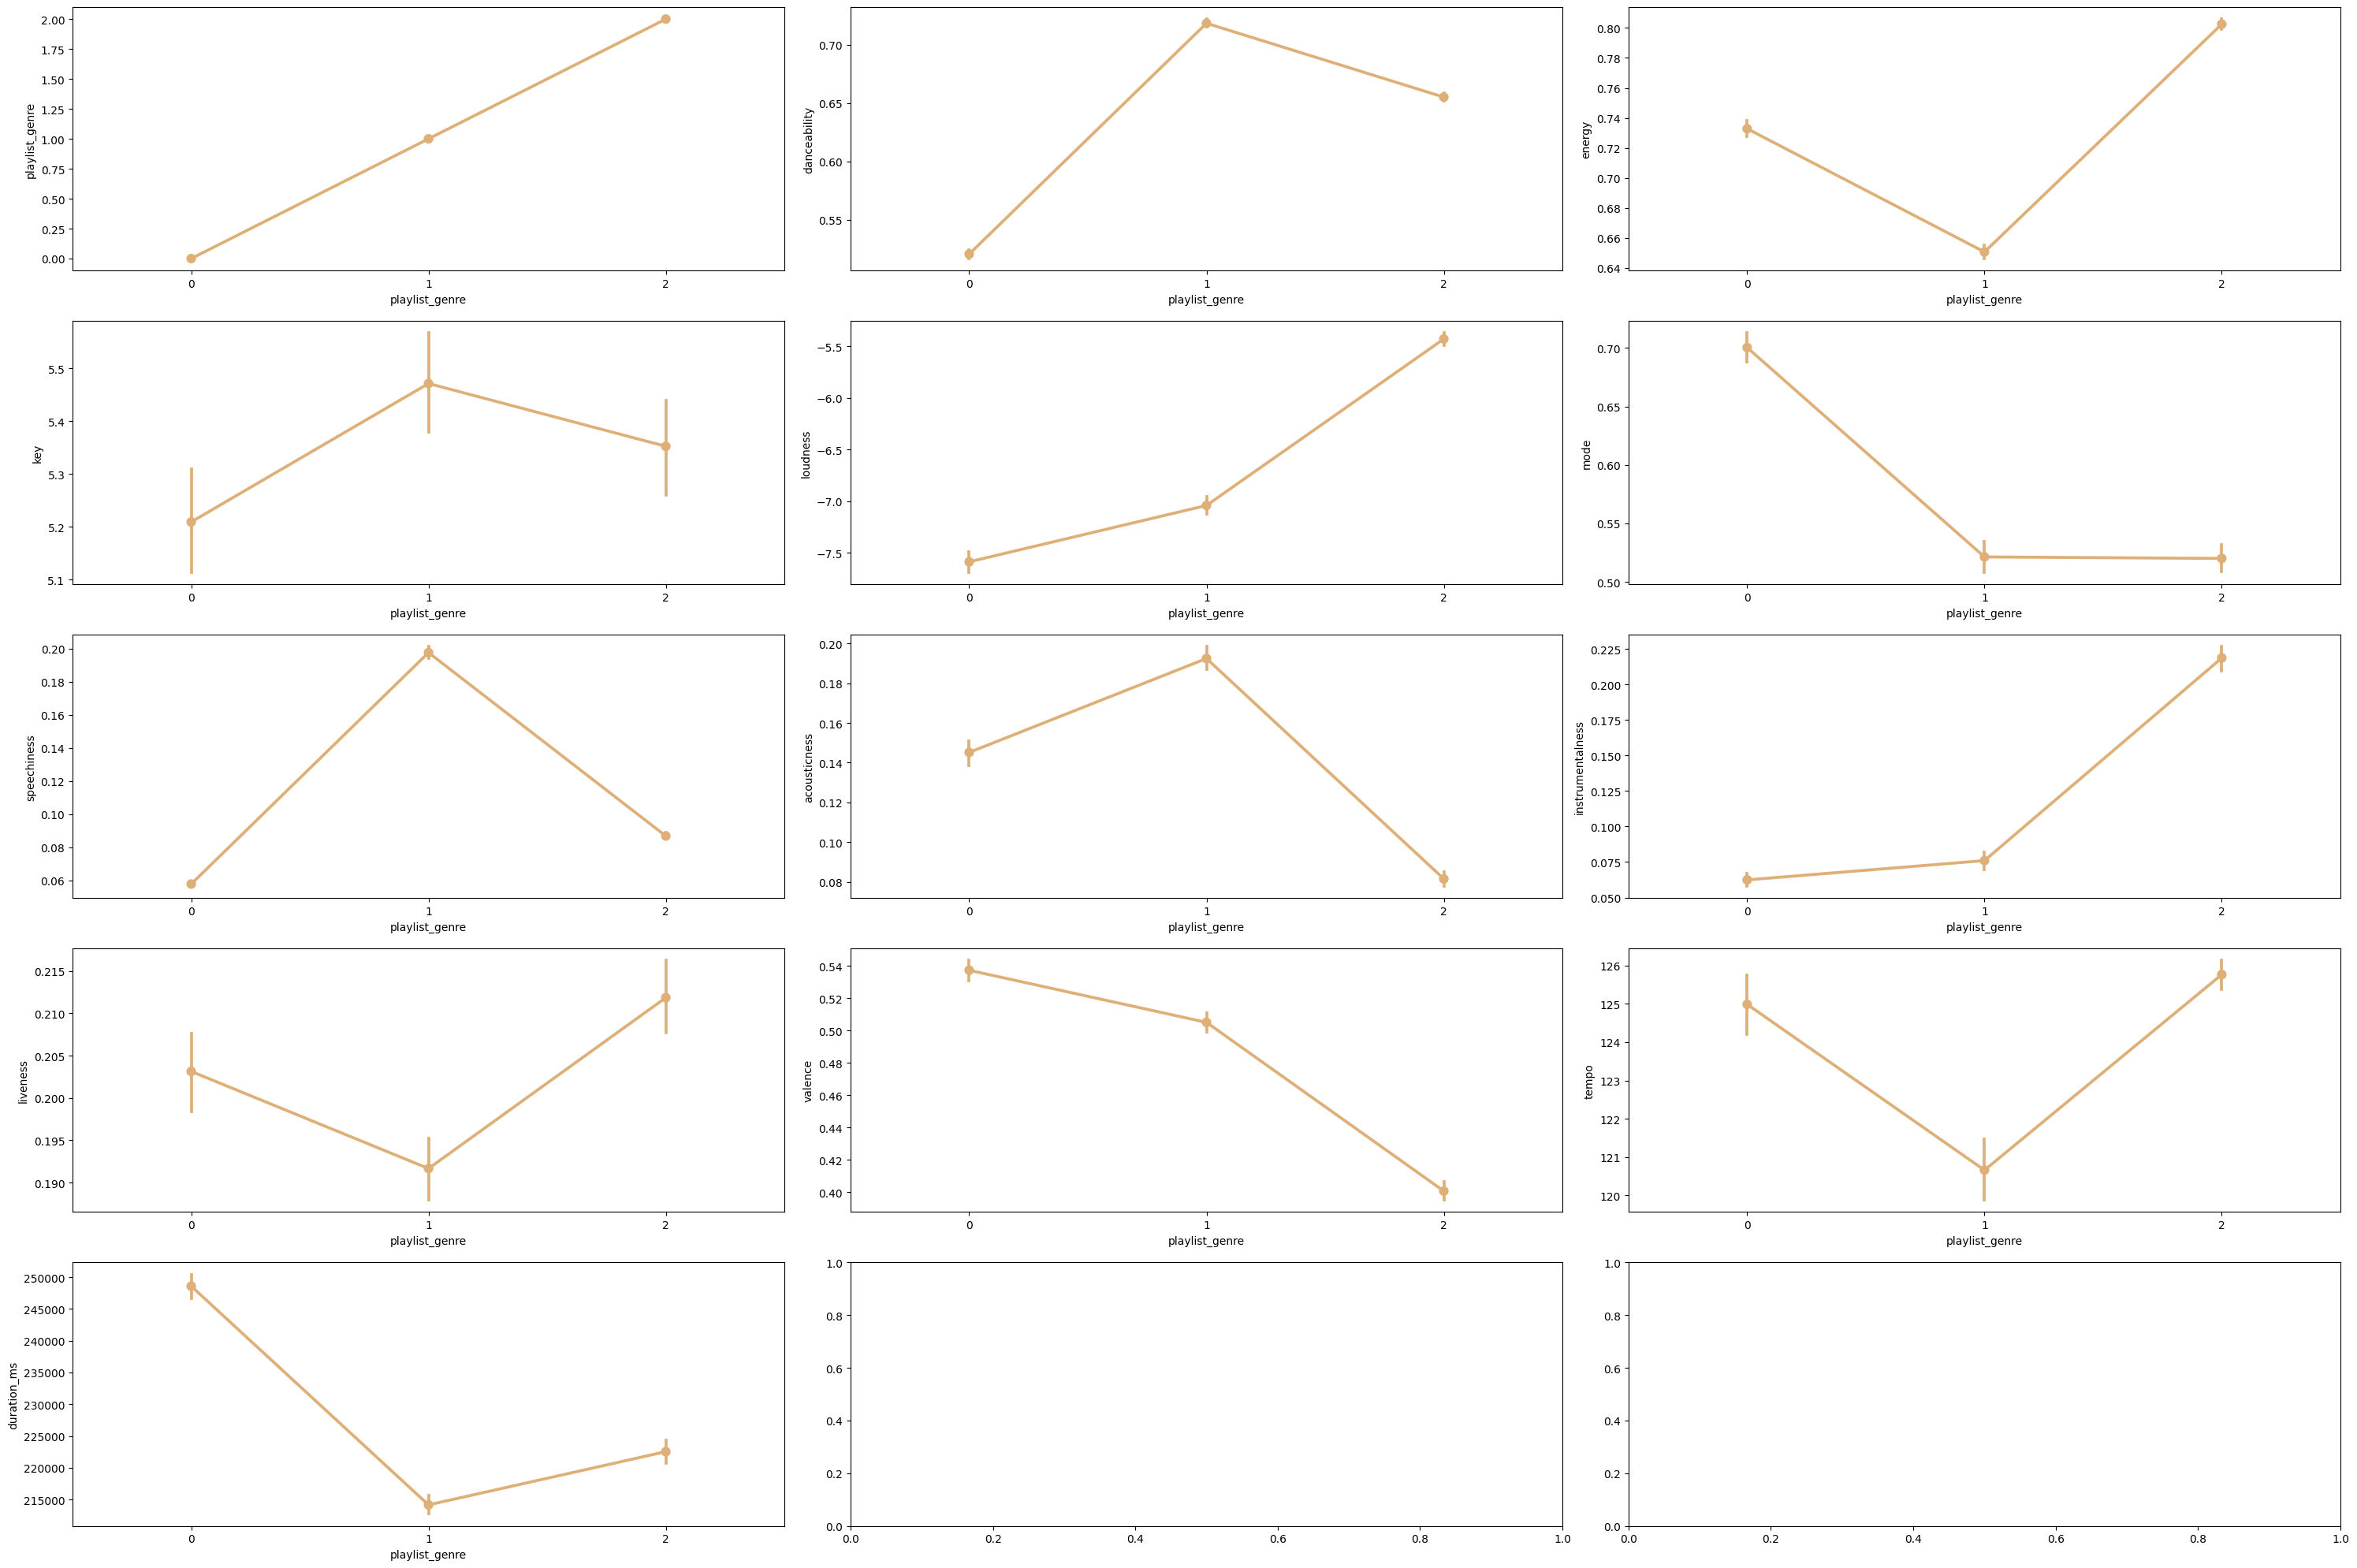

In [232]:
p=df.select_dtypes(include='number').columns.to_list()
p.append("playlist_genre")
y=3
x=math.ceil((len(p)-1)/y)

plt.subplots(x,y,figsize=(30,20))

for i in range(1,len(p)) :
    plt.subplot(x,y,i)
    sns.pointplot(data=df,y=p[i-1],x='playlist_genre',color='#DEB078')

plt.tight_layout()
plt.show()

# Huấn Luyện Mô Hình


In [233]:
df = shuffle(df, random_state=42)
X = df.drop('playlist_genre', axis=1)
y = df['playlist_genre']

In [234]:

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Mô Hình RandomForest

In [235]:
# Mô hình ban đầu
RF_model = RandomForestClassifier(max_depth=100,random_state=42)
RF_model.fit(X_train, y_train)
RF_pred = RF_model.predict(X_test)
RF_accuracy = accuracy_score(y_test, RF_pred)
RF_conf_matrix = confusion_matrix(y_test, RF_pred)


# Sử dụng Stratified K-Fold Cross-Validation với 5 folds
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Đánh giá mô hình bằng kiểm định chéo
cv_scores = cross_val_score(RF_model, X_train, y_train, cv=stratified_k_fold, scoring='accuracy')
# In kết quả
print(f'Random Forest Accuracy: {RF_accuracy}')
print(f'Random Forest Confusion Matrix:\n{RF_conf_matrix}')
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

Random Forest Accuracy: 0.8512544802867383
Random Forest Confusion Matrix:
[[1344   47   96]
 [  92 1459  179]
 [ 124  209 1472]]
Cross-Validation Scores: [0.84982935 0.84940273 0.86049488 0.85403329 0.85958173]
Mean Cross-Validation Accuracy: 0.8546683971863033


## Mô Hình Decision Tree

In [236]:

# Xây dựng và huấn luyện mô hình Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Đánh giá mô hình Decision Tree
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_pred)

print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'Decision Tree Confusion Matrix:\n{dt_conf_matrix}')

# Sử dụng Stratified K-Fold Cross-Validation với 5 folds
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Đánh giá mô hình bằng kiểm định chéo
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=stratified_k_fold, scoring='accuracy')

# In kết quả
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

Decision Tree Accuracy: 0.7608522500995619
Decision Tree Confusion Matrix:
[[1179  124  184]
 [ 139 1289  302]
 [ 198  254 1353]]
Cross-Validation Scores: [0.77261092 0.76023891 0.7581058  0.77208707 0.76056338]
Mean Cross-Validation Accuracy: 0.7647212159085447


## Mô Hình Gradient Boosting

In [237]:
# Huấn luyện mô hình Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

gb_accuracy = accuracy_score(y_test, gb_pred)
gb_conf_matrix = confusion_matrix(y_test, gb_pred)

print(f'Gradient Boosting Accuracy: {gb_accuracy}')
print(f'Gradient Boosting Confusion Matrix:\n{gb_conf_matrix}')


# Sử dụng Stratified K-Fold Cross-Validation với 5 folds
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Đánh giá mô hình bằng kiểm định chéo
cv_scores = cross_val_score(gb_model, X_train, y_train, cv=stratified_k_fold, scoring='accuracy')
# In kết quả
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

Gradient Boosting Accuracy: 0.8458781362007168
Gradient Boosting Confusion Matrix:
[[1317   60  110]
 [ 106 1442  182]
 [ 129  187 1489]]
Cross-Validation Scores: [0.846843   0.84044369 0.84257679 0.84336321 0.85446009]
Mean Cross-Validation Accuracy: 0.845537356937155


## Mô Hình Logistic Regression

In [238]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [239]:
# Huấn luyện mô hình Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Dự đoán với mô hình Logistic Regression
logistic_pred = logistic_model.predict(X_test_scaled)

# Đánh giá mô hình Logistic Regression
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_conf_matrix = confusion_matrix(y_test, logistic_pred)

print(f'Logistic Regression Accuracy: {logistic_accuracy}')
print(f'Logistic Regression Confusion Matrix:\n{logistic_conf_matrix}')



# Sử dụng Stratified K-Fold Cross-Validation với 5 folds
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Đánh giá mô hình bằng kiểm định chéo
cv_scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=stratified_k_fold, scoring='accuracy')
# In kết quả
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

Logistic Regression Accuracy: 0.7578653922739944
Logistic Regression Confusion Matrix:
[[1218   80  189]
 [ 118 1285  327]
 [ 204  298 1303]]
Cross-Validation Scores: [0.76834471 0.74488055 0.76450512 0.76781904 0.75117371]
Mean Cross-Validation Accuracy: 0.7593446239542956


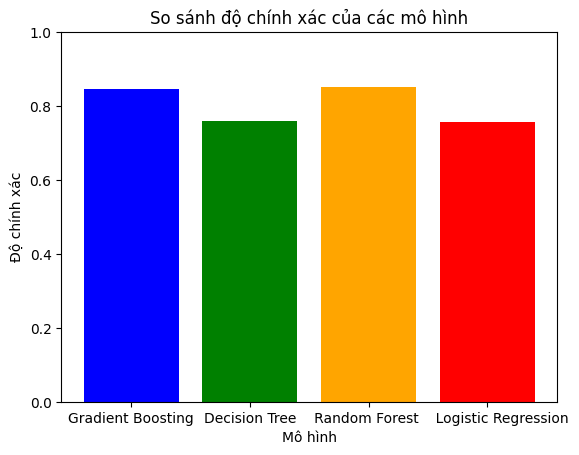

In [240]:
# Độ chính xác của từng mô hình
accuracy_scores = [gb_accuracy, dt_accuracy, RF_accuracy,logistic_accuracy]

# Tên của từng mô hình
model_names = ['Gradient Boosting', 'Decision Tree', '   Random Forest    ','       Logistic Regression']

# Vẽ biểu đồ cột
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'orange','red'])
plt.xlabel('Mô hình')
plt.ylabel('Độ chính xác')
plt.title('So sánh độ chính xác của các mô hình')
plt.ylim(0, 1)  # Điều chỉnh phạm vi trục y nếu cần thiết
plt.show()

*chọn mô hình RandomForest để tinh chỉnh

# Tinh chỉnh siêu tham số

In [251]:
from sklearn.model_selection import GridSearchCV

# Định nghĩa các giá trị tham số cần thử nghiệm
param_grid = {
    'n_estimators': [310], #310
    'max_depth': [20],# 20
    'min_samples_split': [30],#5 30
    'min_samples_leaf': [20]#1   20
}

# Tạo mô hình Random Forest
RF_model_tuned = RandomForestClassifier(random_state=42)

# Sử dụng Grid Search với 5-fold cross-validation
RF_grid_search = GridSearchCV(RF_model_tuned, param_grid, cv=stratified_k_fold, scoring='accuracy', verbose=1, n_jobs=-1)
RF_grid_search.fit(X_train, y_train)

# Kết quả tốt nhất
best_params = RF_grid_search.best_params_
best_accuracy = RF_grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_accuracy}')

# Đánh giá mô hình trên tập kiểm thử với các siêu tham số tốt nhất
tuned_RF_model = RF_grid_search.best_estimator_
tuned_RF_pred = tuned_RF_model.predict(X_test)
tuned_RF_accuracy = accuracy_score(y_test, tuned_RF_pred)
tuned_RF_conf_matrix = confusion_matrix(y_test, tuned_RF_pred)

print(f'Tuned Random Forest Accuracy on Test Set: {tuned_RF_accuracy}')
print(f'Tuned Random Forest Confusion Matrix on Test Set:\n{tuned_RF_conf_matrix}')

cv_scores = cross_val_score(RF_grid_search, X_train, y_train, cv=stratified_k_fold, scoring='accuracy')
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 20, 'min_samples_split': 30, 'n_estimators': 310}
Best Cross-Validation Accuracy: 0.8398190674713293
Tuned Random Forest Accuracy on Test Set: 0.8399044205495818
Tuned Random Forest Confusion Matrix on Test Set:
[[1311   62  114]
 [ 112 1444  174]
 [ 137  205 1463]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Cross-Validation Scores: [0.84001706 0.83916382 0.84044369 0.83781477 0.841656  ]
Mean Cross-Validation Accuracy: 0.8398190674713293


In [242]:
# Đánh giá độ chính xác trên tập huấn luyện và tập kiểm thử của mô hình tinh chỉnh
accuracy_train_tuned_RF = tuned_RF_model.score(X_train, y_train)
accuracy_test_tuned_RF = tuned_RF_model.score(X_test, y_test)

# In độ chính xác
print(f'Tuned Random Forest Accuracy on Training Set: {accuracy_train_tuned_RF}')
print(f'Tuned Random Forest Accuracy on Test Set: {accuracy_test_tuned_RF}')

# So sánh độ chính xác trên tập huấn luyện và tập kiểm thử
accuracy_difference_tuned_RF = accuracy_train_tuned_RF - accuracy_test_tuned_RF
print(f'Difference in Accuracy between Training and Test Sets: {accuracy_difference_tuned_RF}')


Tuned Random Forest Accuracy on Training Set: 0.8760880696364567
Tuned Random Forest Accuracy on Test Set: 0.8399044205495818
Difference in Accuracy between Training and Test Sets: 0.03618364908687488


Mô hình Random Forest đã được điều chỉnh và cho thấy hiệu suất khá tốt trên cả tập huấn luyện và tập kiểm tra. Tuy độ chính xác trên tập kiểm tra thấp hơn một chút so với tập huấn luyện, nhưng chênh lệch này không quá lớn, cho thấy mô hình có khả năng tổng quát hóa tốt đối với dữ liệu mới.

# Đưa Ra Dự Đoán Trên Tập Dữ Liệu Mới


In [243]:
df1 = pd.read_csv('/content/data_check.csv', sep=';')

In [244]:
df1.head()

,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,rap,0.545,0.227,0,-15.497,0,0.0330,0.9720,0.866,0.1050,0.0965,130.121,157406
1,rap,0.516,0.248,6,-13.078,1,0.0446,0.7730,0.807,0.0987,0.1330,89.915,195097
2,rap,0.685,0.295,4,-12.472,1,0.0284,0.9090,0.917,0.1790,0.0878,103.984,170769
3,rap,0.644,0.548,3,-7.459,0,0.0621,0.0926,0.871,0.0708,0.1790,129.954,152606
4,rap,0.499,0.223,6,-14.612,0,0.2020,0.8130,0.952,0.1430,0.4700,68.725,160580


In [245]:
df1.shape

(74, 13)

In [246]:
df1['playlist_genre'].value_counts()

rap     25
rock    25
edm     24
Name: playlist_genre, dtype: int64

In [247]:
genre_mapping = {'rock': 0, 'rap': 1, 'edm': 2}
df1['playlist_genre'] = df1['playlist_genre'].map(genre_mapping)

# Kiểm tra lại kiểu dữ liệu
print(df1['playlist_genre'].dtype)

int64


In [248]:
df1.head()

,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,1,0.545,0.227,0,-15.497,0,0.0330,0.9720,0.866,0.1050,0.0965,130.121,157406
1,1,0.516,0.248,6,-13.078,1,0.0446,0.7730,0.807,0.0987,0.1330,89.915,195097
2,1,0.685,0.295,4,-12.472,1,0.0284,0.9090,0.917,0.1790,0.0878,103.984,170769
3,1,0.644,0.548,3,-7.459,0,0.0621,0.0926,0.871,0.0708,0.1790,129.954,152606
4,1,0.499,0.223,6,-14.612,0,0.2020,0.8130,0.952,0.1430,0.4700,68.725,160580


In [249]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Giả sử 'playlist_genre' là nhãn thực tế trong dữ liệu mới
y_true = df1['playlist_genre']

# Giả sử 'adjusted_model' là mô hình đã được điều chỉnh
new_data_predictions = RF_grid_search.predict(df1.drop('playlist_genre', axis=1))

# Đánh giá hiệu suất
accuracy = accuracy_score(y_true, new_data_predictions)


print("Accuracy:", accuracy)


Accuracy: 0.8378378378378378
